## Setup and Import Libraries

In [1]:
import os
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [4]:
llm=init_chat_model(model="groq:gemma2-9b-it")
llm.invoke("Hey I am Saad and i like to play cricket")

AIMessage(content="Hey Saad,\n\nThat's great! Cricket is a fantastic sport. 🏏\n\nWhat position do you like to play? \n\nDo you have a favorite team or player? 😊\n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 19, 'total_tokens': 61, 'completion_time': 0.076363636, 'prompt_time': 0.001325299, 'queue_time': 0.25533085, 'total_time': 0.077688935}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--7a380d51-a7ab-486e-aa91-146cebdae61e-0', usage_metadata={'input_tokens': 19, 'output_tokens': 42, 'total_tokens': 61})

## Creating Nodes

In [5]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [6]:
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

In [7]:
graph = StateGraph(State)

# Add Nodes
graph.add_node(node="SuperBot", action=superbot)

# Add Edges
graph.add_edge(start_key=START, end_key="SuperBot")
graph.add_edge(start_key="SuperBot", end_key=END)

# Compile Graph
compiled_graph = graph.compile()

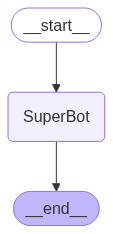

In [8]:
from IPython.display import Image, display
display(Image(compiled_graph.get_graph().draw_mermaid_png()))

### Invoation

In [9]:
query = "Hi! My name is Saad and I like to play Cricket"

compiled_graph.invoke({'messages':query})

{'messages': [HumanMessage(content='Hi! My name is Saad and I like to play Cricket', additional_kwargs={}, response_metadata={}, id='cba157ad-e875-4fca-8539-1879ebd7442d'),
  AIMessage(content="Hi Saad,\n\nIt's nice to meet you! Cricket is a great sport. 🏏  \n\nDo you have a favorite team or player? 😊  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 21, 'total_tokens': 58, 'completion_time': 0.067272727, 'prompt_time': 0.001338148, 'queue_time': 0.258187941, 'total_time': 0.068610875}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a661c800-7ae3-4d94-aa77-b5a7458cc572-0', usage_metadata={'input_tokens': 21, 'output_tokens': 37, 'total_tokens': 58})]}

### Streaming The Responses

In [10]:
query = "Hi! My name is Saad"

for event in compiled_graph.stream({"messages":query}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hi Saad, it's nice to meet you!\n\nWhat can I do for you today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 15, 'total_tokens': 38, 'completion_time': 0.041818182, 'prompt_time': 0.001252098, 'queue_time': 0.256984441, 'total_time': 0.04307028}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6a17a4b0-4108-4e95-a92b-971c57293488-0', usage_metadata={'input_tokens': 15, 'output_tokens': 23, 'total_tokens': 38})]}}


In [11]:
query = "Hi! My name is Saad"

for event in compiled_graph.stream({"messages":query}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hi! My name is Saad', additional_kwargs={}, response_metadata={}, id='2f3903b6-76de-4b91-a7b4-9f184fb31ba1')]}
{'messages': [HumanMessage(content='Hi! My name is Saad', additional_kwargs={}, response_metadata={}, id='2f3903b6-76de-4b91-a7b4-9f184fb31ba1'), AIMessage(content="Hi Saad, it's nice to meet you! 👋\n\nWhat can I do for you today? 😄  \n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 15, 'total_tokens': 41, 'completion_time': 0.047272727, 'prompt_time': 0.001245998, 'queue_time': 0.253730562, 'total_time': 0.048518725}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--db2f4b52-16fa-4539-a965-42a3bd51e4bc-0', usage_metadata={'input_tokens': 15, 'output_tokens': 26, 'total_tokens': 41})]}


In [12]:
query = "Hi! My name is Saad"

for event in compiled_graph.stream({"messages":query}, stream_mode="updates"):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hi Saad, it's nice to meet you! 👋\n\nWhat can I do for you today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 15, 'total_tokens': 39, 'completion_time': 0.043636364, 'prompt_time': 0.001245439, 'queue_time': 0.255060411, 'total_time': 0.044881803}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--44669c38-9eaa-4f68-96a9-61502c98fe19-0', usage_metadata={'input_tokens': 15, 'output_tokens': 24, 'total_tokens': 39})]}}
